# 1.导入数据

In [2]:
# 导入数据集
import pandas as pd
data = pd.read_csv(r"C:\Users\Terry\Desktop\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


数据集有1025行，14列。每行表示一个病人。13列表示特征，1列表示标签(是否患心脏病)

In [7]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

|字段名|含义|
|---|---|
| age      | 年龄                                                         |
| sex      | 性别，1表示男，0表示女                                       |
| cp       | 心绞痛病史，1:典型心绞痛，2:非典型心绞痛，3:无心绞痛，4:无症状 |
| trestbps | 静息血压，入院时测量得到，单位为毫米汞柱(mm Hg)              |
| chol     | 胆固醇含量，单位:mgldl                                       |
| fbs      | 空腹时是否血糖高，如果空腹血糖大于120 mg/dl，值为1，否则值为0 |
| restecg  | 静息时的心电图特征。0:正常。1:  ST-T波有异常。2:根据Estes准则，有潜在的左 |
| thalach  | 最大心率                                                     |
| exang    | 运动是否会导致心绞痛,1表示会，0表示不会                      |
| oldpeak  | 运动相比于静息状态，心电图中的ST-T波是否会被压平。1表示会，0表示不会 |
| slope    | 心电图中ST波峰值的坡度（1:上升，2:平坦，3:下降)              |
| ca       | 心脏周边大血管的个数(0-3)                                    |
| thal     | 是否患有地中海贫血症（0 =正常；1 =固定缺陷；2 =可逆缺陷） |
| target   | 标签列。是否有心脏病，0表示没有，1表示有                     |

# 2.数据预处理 探索性数据分析

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 112.2+ KB


In [11]:
# 缺失值的检查
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

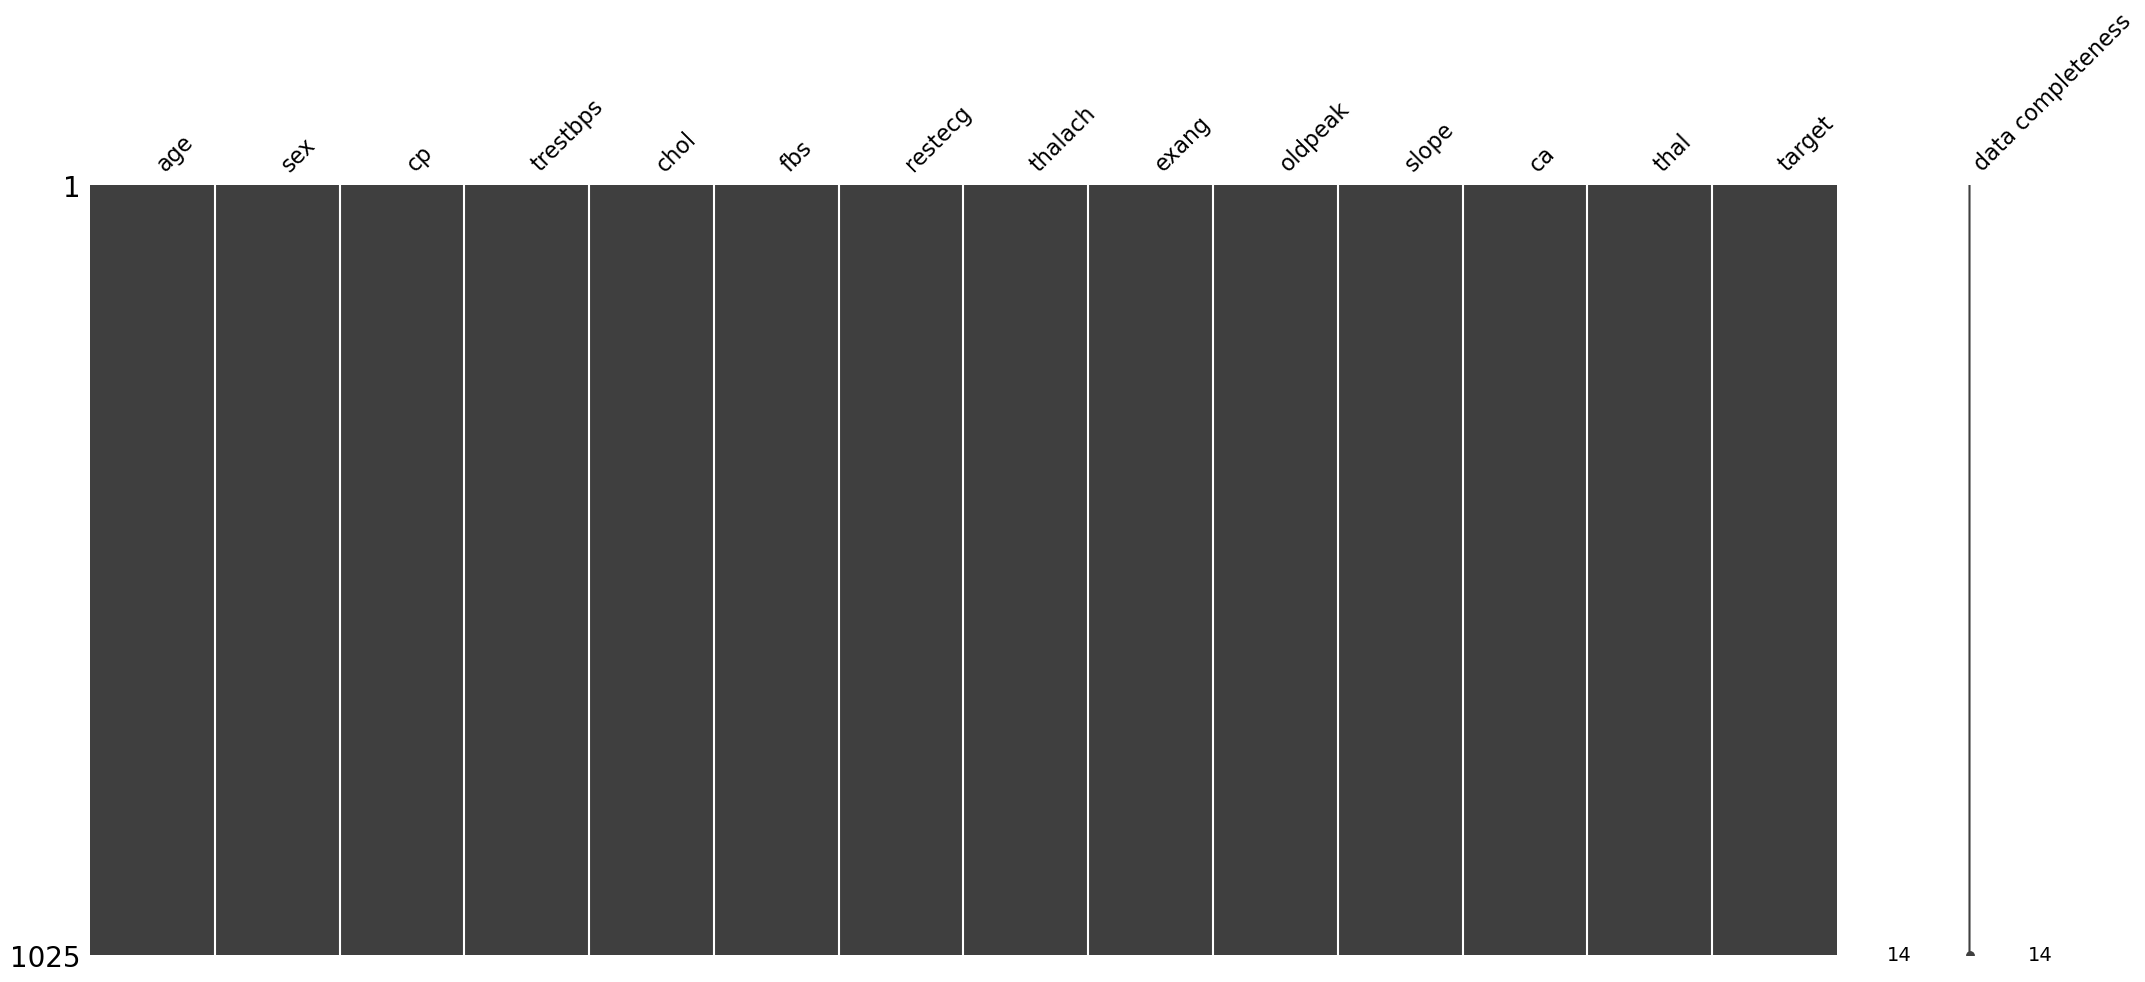

In [10]:
import missingno as msno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Roboto'] 
msno.matrix(data, labels=True)
# 忽略warnings
import warnings
warnings.filterwarnings("ignore")

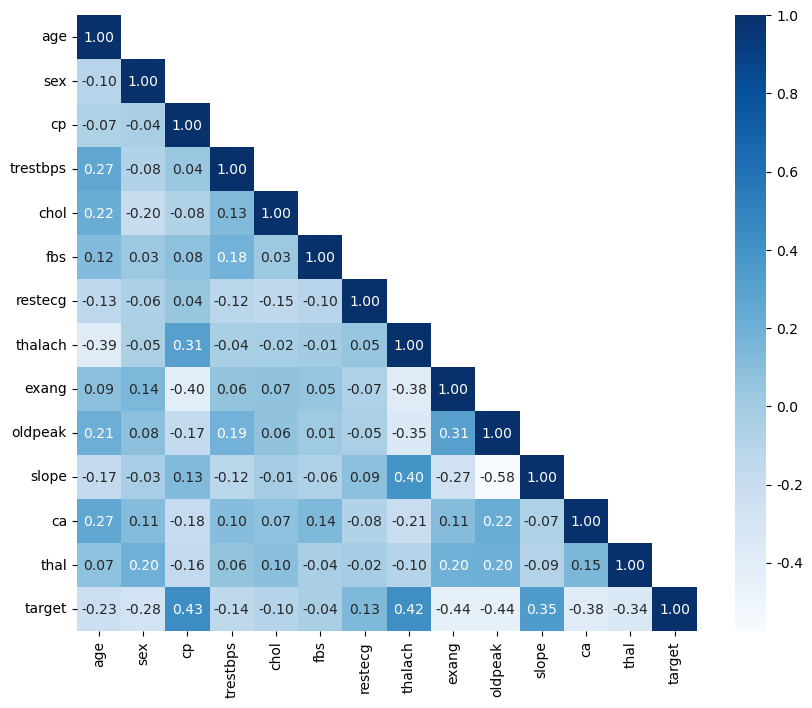

In [14]:
# 热力图绘制
def enhanced_corr_heatmap(data):
    """绘制数据皮尔逊相关性系数的热力图（下三角显示）"""
    
    # 导包
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # matplotlib的图像大小和字体显示设置
    plt.figure(figsize=(10, 8)) # 可同比例放大
    plt.rcParams['font.sans-serif'] = ['Roboto'] # 美化字体
    plt.rcParams['axes.unicode_minus'] = False # 显示负数
    
    #保留下三角：
    data_corr = data.corr()
    mask = np.zeros_like(data_corr)
    for i in range(1,len(mask)):
      for j in range(0,i):
        mask[j][i] = True # 上三角就mask[i][j] = True
    
    # 绘图
    sns.heatmap(data_corr,annot=True, fmt=".2f",cmap = 'Blues',mask = mask)
    plt.show()
enhanced_corr_heatmap(data)

# 3.特征工程

In [20]:
df = data
# 将定类特征由整数编码转为实际对应的字符串，还原为真实含义
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['cp'][df['cp'] == 0] = 'typical angina'
df['cp'][df['cp'] == 1] = 'atypical angina'
df['cp'][df['cp'] == 2] = 'non-anginal pain'
df['cp'][df['cp'] == 3] = 'asymptomatic'
 
df['fbs'][df['fbs'] == 0] = 'lower than 120mg/ml'
df['fbs'][df['fbs'] == 1] = 'greater than 120mg ml'
 
df['restecg'][df['restecg'] == 0] = 'normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'left ventricular hyper trophy'
 
df['exang'][df['exang'] == 0] = 'no'
df['exang'][df['exang'] == 1] = 'yes'
 
df['slope'][df['slope'] == 0] = 'upsloping'
df['slope'][df['slope'] == 1] = 'flat'
df['slope'][df['slope'] == 2] = 'downsloping'
 
df['thal'][df['thal'] == 0] = 'unknown'
df['thal'][df['thal'] == 1] = 'normal'
df['thal'][df['thal'] == 2] = 'fixed defect'
df['thal'][df['thal'] == 3] = 'reversable defect'
 
# 将离散的定类和定序特征列转为One-Hot独热编码
# 将定类数据扩展为特征
df = pd.get_dummies(df)

In [21]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_female,sex_male,cp_asymptomatic,...,restecg_normal,exang_no,exang_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,thal_unknown
0,52,125,212,168,1.0,2,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,53,140,203,155,3.1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
2,70,145,174,125,2.6,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,61,148,203,161,0.0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,62,138,294,106,1.9,3,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0,1,0,1,0,...,0,0,1,1,0,0,1,0,0,0
1021,60,125,258,141,2.8,1,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
1022,47,110,275,118,1.0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
1023,50,110,254,159,0.0,0,1,1,0,0,...,1,1,0,1,0,0,1,0,0,0


# 4.模型训练，参数调优（贝叶斯调优）

In [69]:
# 去掉这一列  矩阵用X表示  input
X = df.drop('target',axis=1)
# y向量
y = df['target']
# 切分测试集和验证集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [70]:
# 设置几个参数
import lightgbm as lgb
from sklearn.model_selection import cross_val_score,KFold
from bayes_opt import BayesianOptimization
def lgb_cv(colsample_bytree, min_child_samples, num_leaves, subsample, max_depth):
    model = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',
           colsample_bytree=float(colsample_bytree), learning_rate=0.01,
           min_child_samples=int(min_child_samples), min_child_weight=0.001, 
           n_estimators=800, n_jobs=-1, num_leaves=int(num_leaves),
           random_state=None, reg_alpha=0.0, reg_lambda=0.0,max_depth=int(max_depth),
           subsample=float(subsample))
    cv_score = cross_val_score(model, X_train, y_train, scoring="f1", cv=5).mean()
    return cv_score
# 使用贝叶斯优化
lgb_bo = BayesianOptimization(
        lgb_cv,
        {'colsample_bytree': (0.7,1),
        'min_child_samples': (2, 25),
        'num_leaves': (5, 250),
        'subsample': (0.7, 1),
        'max_depth':(2,10)}
    )
lgb_bo.maximize()
lgb_bo.max

|   iter    |  target   | colsam... | max_depth | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------
| 1         | 0.975     | 0.7913    | 6.354     | 12.72     | 173.6     | 0.9068    |
| 2         | 0.9733    | 0.8968    | 9.003     | 10.3      | 131.1     | 0.8315    |
| 3         | 0.9523    | 0.8282    | 3.854     | 23.45     | 218.2     | 0.7749    |
| 4         | 0.9738    | 0.7265    | 4.173     | 15.92     | 210.6     | 0.8746    |
| 5         | 0.9778    | 0.9717    | 9.477     | 16.13     | 219.6     | 0.9489    |
| 6         | 0.9723    | 0.9453    | 4.576     | 15.87     | 210.2     | 0.9975    |
| 7         | 0.975     | 0.8017    | 7.711     | 13.1      | 216.4     | 0.9629    |
| 8         | 0.9733    | 0.9483    | 8.279     | 12.78     | 222.7     | 0.982     |
| 9         | 0.8958    | 0.7       | 2.0       | 11.72     | 214.0     | 0.7       |
| 10        | 0.9808    | 0.8825    | 9.229     | 18.1

{'target': 0.98077682946104,
 'params': {'colsample_bytree': 0.8825156866688096,
  'max_depth': 9.22852569044181,
  'min_child_samples': 18.187925142422635,
  'num_leaves': 214.92095842701295,
  'subsample': 0.9180263743786915}}

In [71]:
# 将优化好的参数带入进行使用 部分参数需要取整
lgbm_clf  = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',
           colsample_bytree=0.8825, learning_rate=0.01,
           min_child_samples=18, min_child_weight=0.001, 
           n_estimators=800, n_jobs=-1, num_leaves=214,
           random_state=None, reg_alpha=0.0, reg_lambda=0.0,max_depth= 9,
           subsample=0.9180)
cv_score = cross_val_score(lgbm_clf , X_train, y_train, scoring="f1", cv=5).mean()
cv_score

0.98077682946104

In [72]:
lgbm_clf .fit(X_train, y_train)
y_pred = lgbm_clf .predict(X_test)
y_score = lgbm_clf .predict_proba(X_test)[:,1]

# 5.模型评价

In [66]:
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.subplots as tls
import plotly.figure_factory as ff
import numpy as np

In [67]:
def model_performance(model) : 
    #Conf matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #Roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
    fpr, tpr, t = roc_curve(y_test, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    #Feature importance
    coefficients  = pd.DataFrame(eval(model).feature_importances_)
    column_data   = pd.DataFrame(list(data))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace6 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    
    #Cumulative gain
    pos = np.array(pd.get_dummies(y_test))
    pos = pos[:,1] 
    npos = np.sum(pos)
    index = np.argsort(y_score) 
    index = index[::-1] 
    sort_pos = pos[index]
    #cumulative sum
    cpos = np.cumsum(sort_pos) 
    #recall
    recall = cpos/npos 
    #size obs test
    n = y_test.shape[0] 
    size = np.arange(start=1,stop=369,step=1) 
    #proportion
    size = size / n 
    #plots
    model = model
    trace7 = go.Scatter(x = size,y = recall,
                        name = "Lift curve",
                        line = dict(color = ('gold'),width = 2), fill='tozeroy') 
    
    #Subplots
    fig = tls.make_subplots(rows=4, cols=2, print_grid=False, 
                          specs=[[{}, {}], 
                                 [{}, {}],
                                 [{'colspan': 2}, None],
                                 [{'colspan': 2}, None]],
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve',
                                        'Cumulative gains curve',
                                        'Feature importance',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    fig.append_trace(trace6,4,1)
    fig.append_trace(trace7,3,1)
    
    # 图布局修正
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = False, height = 1500,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig["layout"]["xaxis5"].update(dict(title = "Percentage contacted"))
    fig["layout"]["yaxis5"].update(dict(title = "Percentage positive targeted"))
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

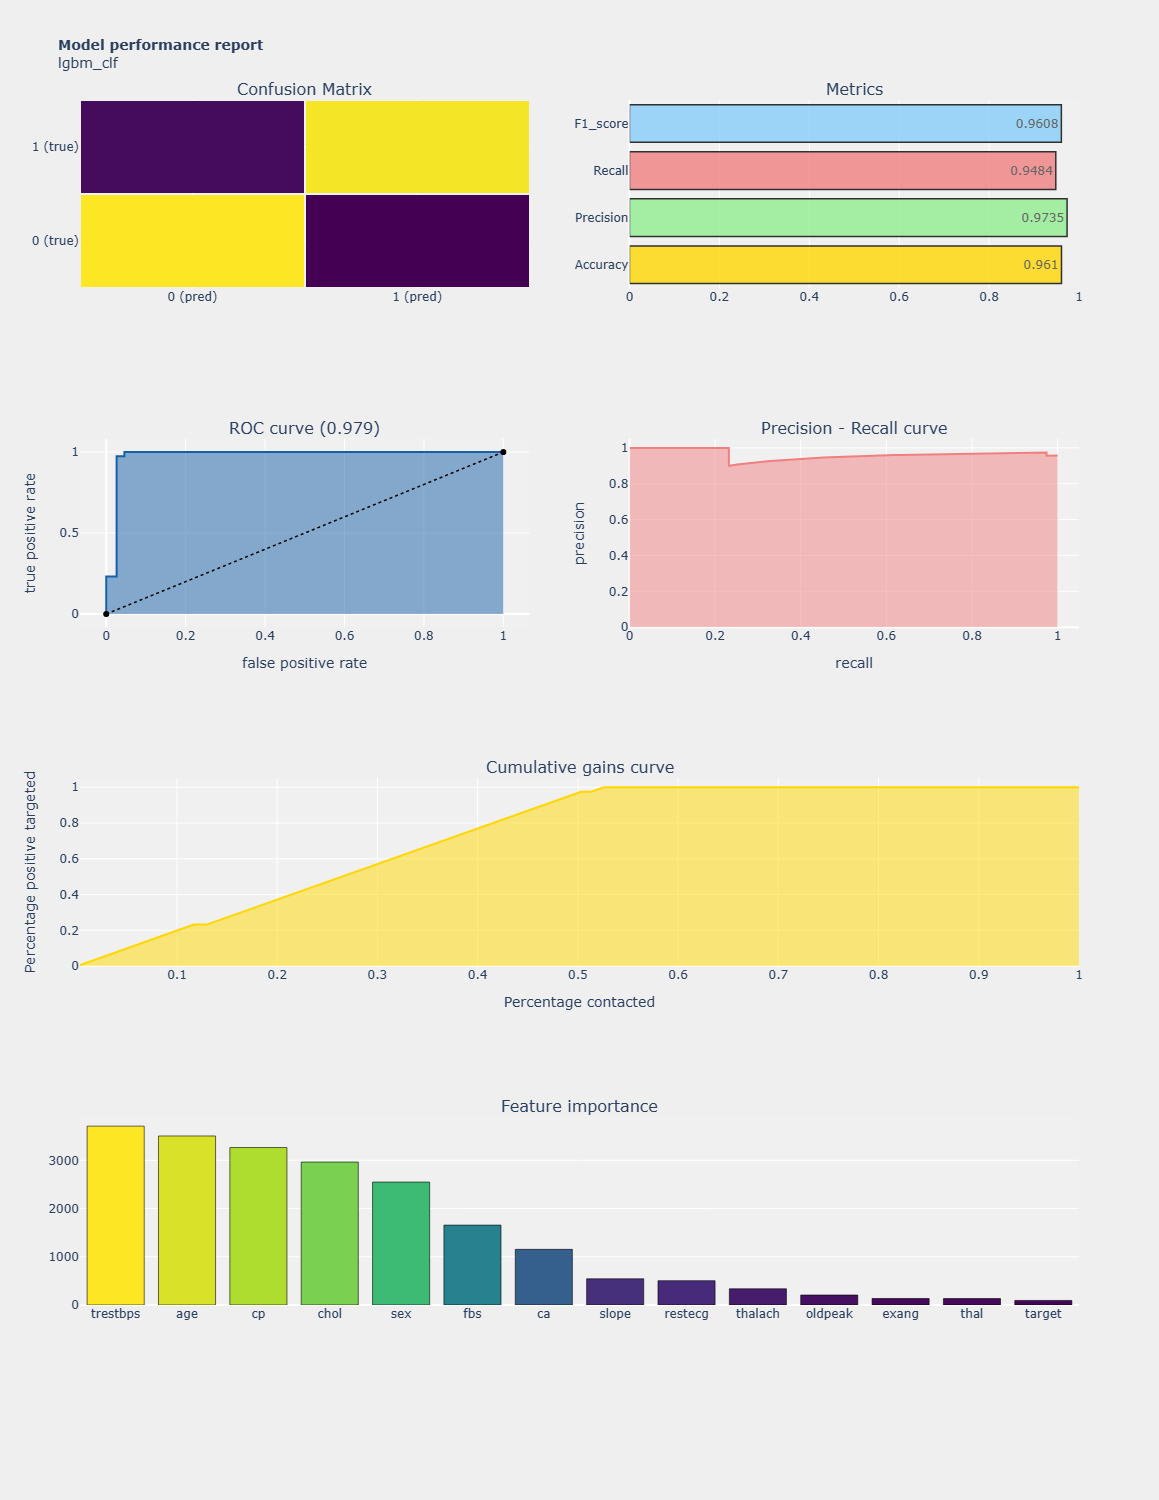

In [73]:
model_performance('lgbm_clf ')